#K-Means Clustering Python Demo

Create our sample dataset

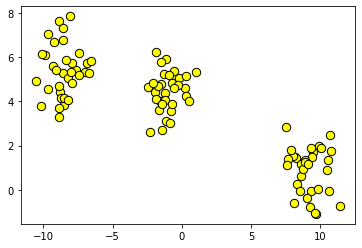

In [2]:
# Let's make a dataset that we'll use to demo KNN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# We use make_blobs to create a 200 samples, of two classes with 3 centers
X, Y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, shuffle=True, random_state=7)

# plot our points
plt.scatter(X[:, 0], X[:, 1], c='yellow', marker='o', edgecolor='black', s=70)
plt.show()

Use Sklearn's KMeans Class

In [3]:
from sklearn.cluster import KMeans

# We set k=3 for this first trial, which we run for 10 times (n_init) and run it for 500 iterations

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=500,  tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

# NOTE: We avoid convergence problems by choosing larger values for tol, 
# which is a parameter that controls the tolerance with regard to 
# the changes in the within-cluster sum-squared-error to declare convergence. 
# In the preceding code, we chose a tolerance of 1e-04 (= 0.0001)

In [4]:
y_km

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2,
       1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0,
       2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0])

Create Visualizations for each Cluster

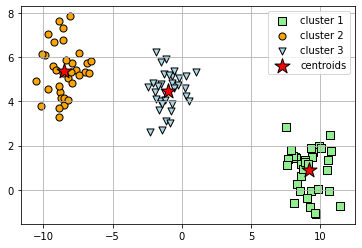

In [5]:
# plot the 3 clusters
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')

# plot the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*',c='red', edgecolor='black',label='centroids')
plt.legend(scatterpoints=1)
plt.grid()

# Apply the Elbow Method using sum squared Distances

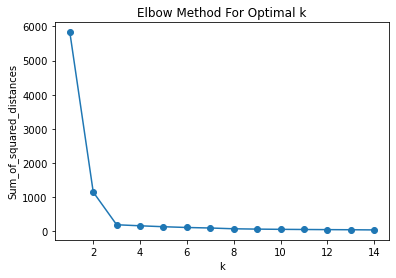

In [6]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=500,  tol=1e-04, random_state=0)
    km = km.fit(X)
    # Get sum of square distances by applying km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)

# Plot Results
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette Analysis

For n_clusters = 2 The average silhouette_score is : 0.7241772787911378
For n_clusters = 3 The average silhouette_score is : 0.7900256909280773
For n_clusters = 4 The average silhouette_score is : 0.6484628682263633
For n_clusters = 5 The average silhouette_score is : 0.5012364770375517
For n_clusters = 6 The average silhouette_score is : 0.5302783860869873


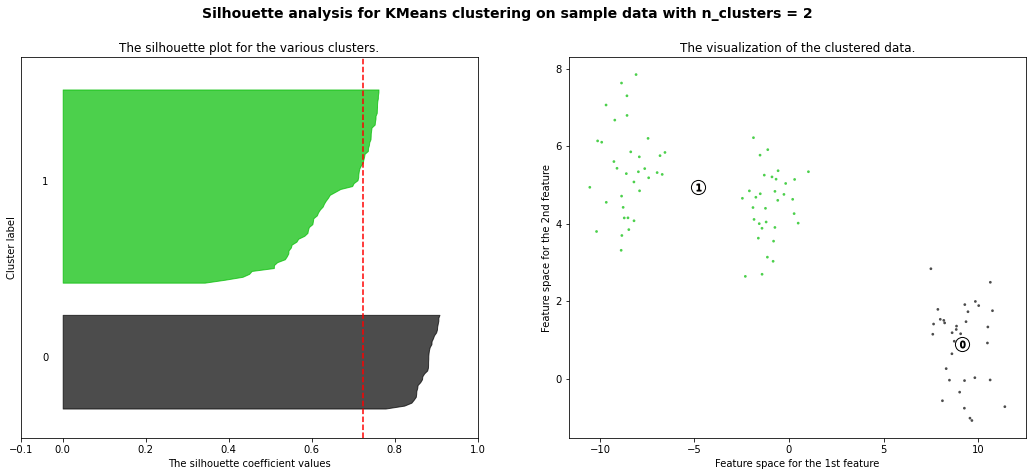

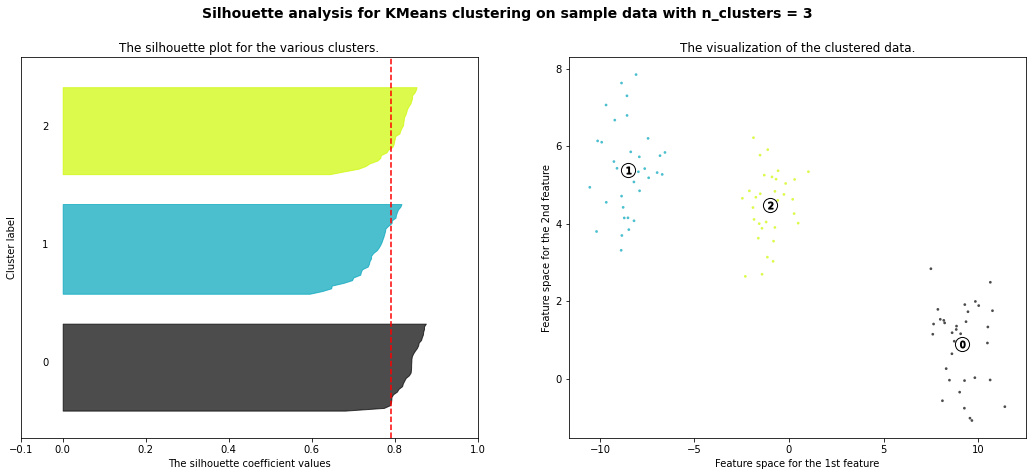

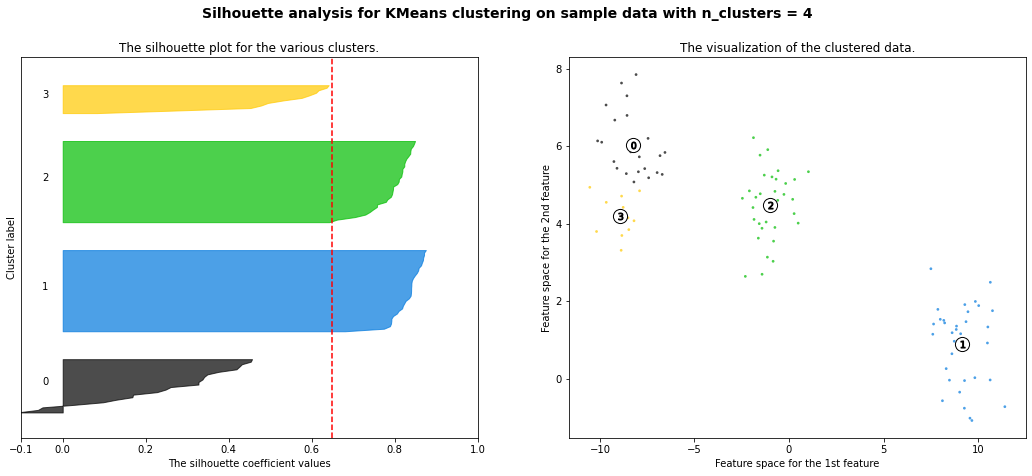

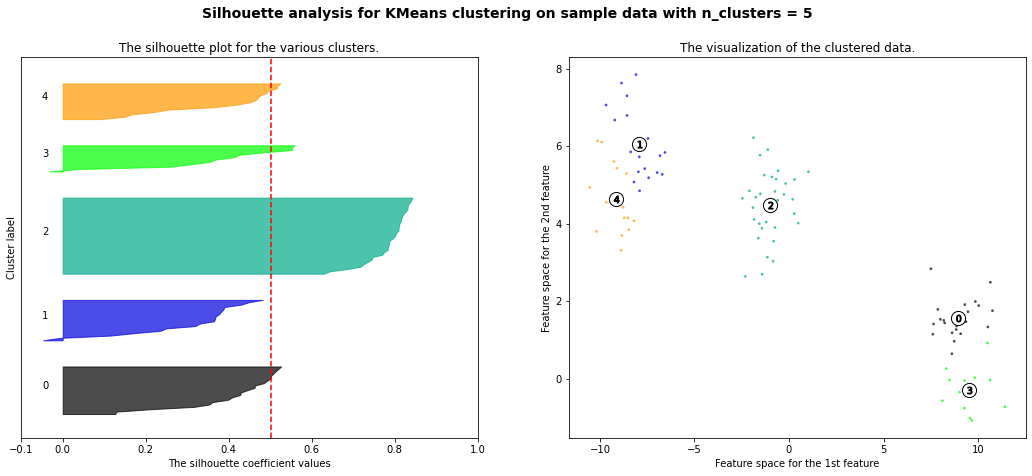

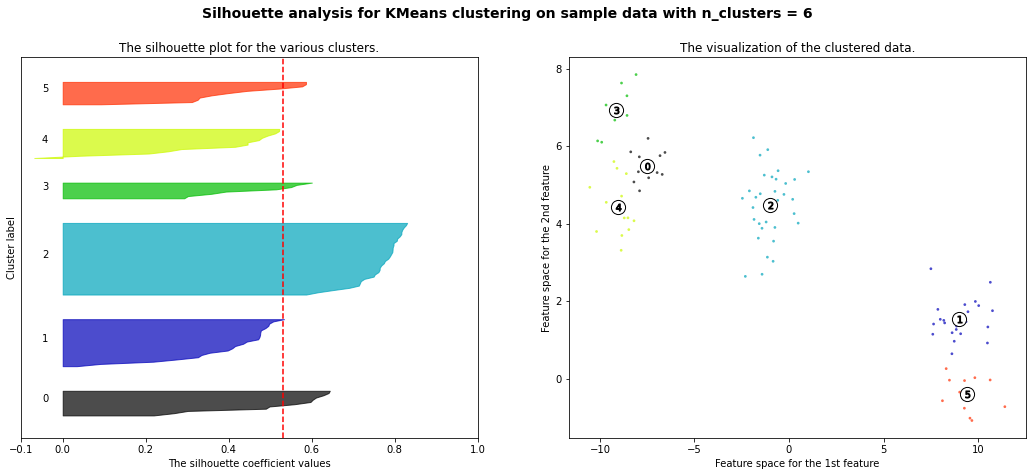

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()